
Name: Chiam Joon Wee<br/><br/>
Admin Number: 2222415<br/><br/>
Class: DAAA/FT/1B/05<br/><br/>

<hr>
<h3>Accessibility of bus services - Objective 1</h3>
<ol>

Objective 1 datasets are the datasets given by school

</ol>


<h3>Analysis/Trend of bus services - Objective 2</h3>
<ol>

https://data.gov.sg/dataset/annual-age-bus-population-by-passenger-capacity

https://data.gov.sg/dataset/public-transport-utilisation-average-public-transport-ridership?view_id=3619b55d-d1c2-4891-8b43-97b192bcb0c4&resource_id=552b8662-3cbc-48c0-9fbb-abdc07fb377a

</ol>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot
# import plotly as px
import geopandas as gpd
import plotly.express as px


In [2]:
def calcAvg(value):
    if '-' in value:
        s,e = [float(i) for i in value.split("-")]
        return round((s+e)/2,2)
    else:
        return int(value)


<AxesSubplot: title={'center': 'PM'}, xlabel='PM_Peak_Freq', ylabel='Number of Bus Services'>

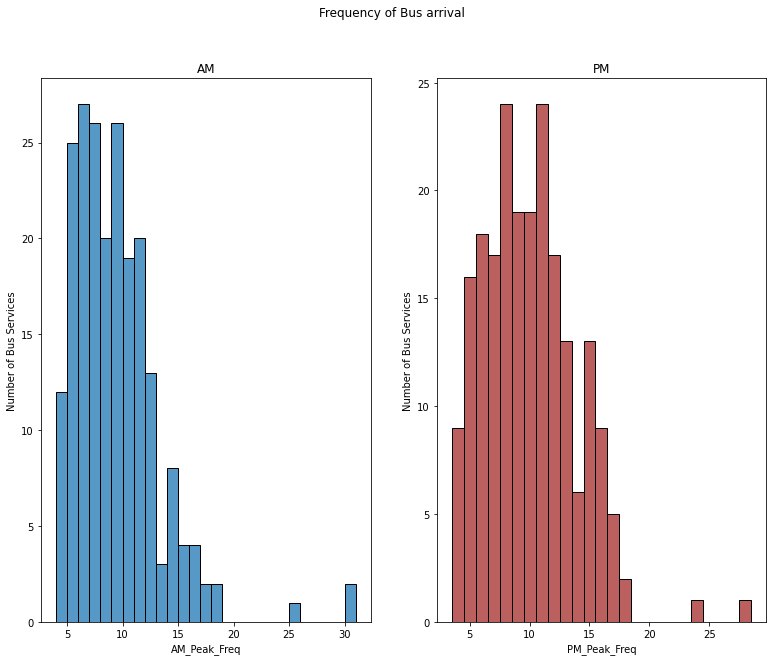

In [3]:
#Am peak frequency
df = pd.read_csv('data/bus_services.csv')
df.groupby(['AM_Peak_Freq'])
df.replace('-',np.nan, inplace=True)
df = df.dropna()


df['AM_Peak_Freq'] = df['AM_Peak_Freq'].apply(calcAvg)
df.replace(0,np.nan, inplace=True)
df = df.dropna()
df['AM_Peak_Freq'] = pd.to_numeric(df['AM_Peak_Freq'], errors='coerce')



df = df.sort_values('AM_Peak_Freq', ascending=True)
count = df.pivot_table(index = ['AM_Peak_Freq'], aggfunc ='size')
len(count)



#Pm peak frequency
df2 = pd.read_csv('data/bus_services.csv')
df2.groupby(['PM_Peak_Freq'])
df.replace('-',np.nan, inplace=True)
df = df.dropna()


df2['PM_Peak_Freq'] = df['PM_Peak_Freq'].apply(calcAvg)
df2.replace(0,np.nan, inplace=True)
df2 = df2.dropna()
df2['PM_Peak_Freq'] = pd.to_numeric(df2['PM_Peak_Freq'], errors='coerce')


df2 = df2.sort_values('PM_Peak_Freq', ascending=True)
count = df2.pivot_table(index = ['PM_Peak_Freq'], aggfunc ='size')
len(count)




fig, axes = plt.subplots(1, 2, figsize=(13,10))
fig.suptitle('Frequency of Bus arrival')
axes[0].set_title('AM')
axes[0].set_ylabel('Number of Bus Services')
sns.histplot(ax=axes[0], x='AM_Peak_Freq',data=df,bins=27)
# sns.displot(x='AM_Peak_Freq',data=df, kde=True)


axes[1].set_title('PM')
axes[1].set_ylabel('Number of Bus Services')
sns.histplot(ax=axes[1], x='PM_Peak_Freq',data=df2,bins=25 , color='brown')
 


,ServiceNo,AvgDist,Operators
38,119,0.24,GAS
373,43,0.26,GAS
131,15A,0.32,GAS
304,2A,0.33,GAS
538,82,0.36,GAS
...,...,...,...
474,663,1.31,TTS
477,66A,1.34,TTS
476,665,1.39,TTS
473,663,2.07,TTS


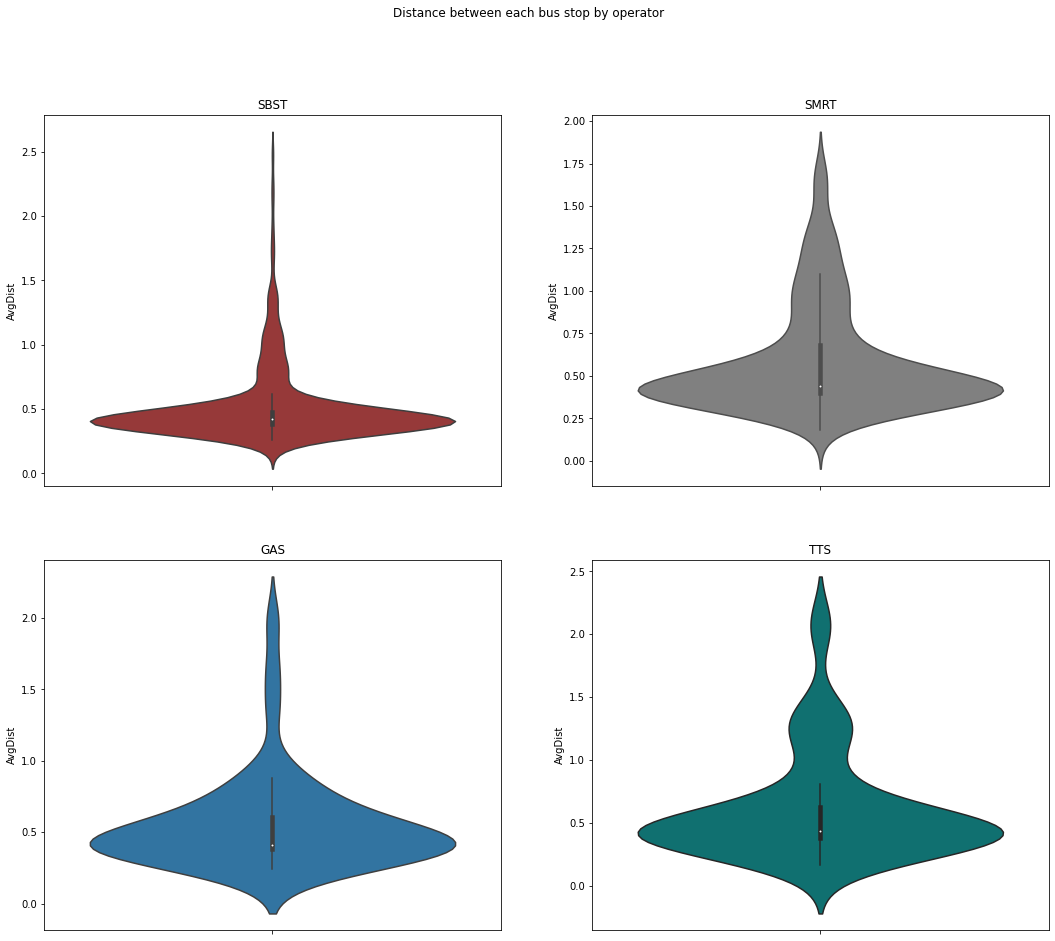

In [4]:
df = pd.read_csv('data/bus_routes.csv',  dtype={"BusStopCode":"object"})



dftotest = df.drop_duplicates()
serviceNo = []
distbetween = []
savelst=0
count = 1
prevNum = 0

for i in range(len(dftotest)):
    if dftotest.iloc[i]['Distance'] == 0:
        serviceNo.append(dftotest.iloc[i]['ServiceNo'])
        aveDist = savelst/count
        distbetween.append(round(aveDist,2))
        savelst=0
        prevNum = 0
        count = 1
    else:
        count += 1
        currentNum = dftotest.iloc[i]['Distance']
        savelst+=(currentNum-prevNum)
        prevNum = dftotest.iloc[i]['Distance']
        
#print(serviceNo)
#print(distbetween[1:])
allOperators = []
for i in serviceNo:
    operator = df[df['ServiceNo']== i]['Operator'].iloc[1]
    allOperators.append(operator)

dfFinal = pd.DataFrame({"ServiceNo":serviceNo,"AvgDist":distbetween, "Operators":allOperators})
dfFinal= dfFinal[dfFinal['AvgDist'] != 0]


dfFinal = dfFinal.sort_values(['Operators','AvgDist'],ascending=True)
display(dfFinal)



fig, axes = plt.subplots(2, 2, figsize=(18,15))
fig.suptitle('Distance between each bus stop by operator ')
sns.violinplot(data=df2, y=dfFinal[dfFinal['Operators'] == "SBST"]['AvgDist'],  ax=axes[0,0], color="brown")
axes[0,0].title.set_text('SBST')
sns.violinplot(data=df2, y=dfFinal[dfFinal['Operators'] == "SMRT"]['AvgDist'],  ax=axes[0,1], color="grey")
axes[0,1].title.set_text('SMRT')
sns.violinplot(data=df2, y=dfFinal[dfFinal['Operators'] == "GAS"]['AvgDist'],  ax=axes[1,0])
axes[1,0].title.set_text('GAS')
sns.violinplot(data=df2, y=dfFinal[dfFinal['Operators'] == "TTS"]['AvgDist'],  ax=axes[1,1], color="teal")
axes[1,1].title.set_text('TTS')

In [5]:
import plotly.express as px

dfStops = pd.read_csv('data/bus_stops.csv')


fig = px.scatter_mapbox(dfStops, 
                    lat=dfStops["Latitude"], 
                    lon=dfStops["Longitude"], 
                    animation_frame="RoadName",
                    zoom=11, 
                    color=dfStops['BusStopCode'],
                    width=1200,
                    height=900,
                    title='Distribution of Bus Stops',
                  )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":50, "l":0,"b":10})



## Objective 2

,ServiceNo,Direction,Operator,Distance
0,10,1,SBST,31.7
2,100,1,SBST,23.6
4,100A,1,SBST,4.7
5,101,1,SBST,15.5
6,102,1,SBST,23.3
...,...,...,...,...
718,NR3,1,SMRT,31.0
719,NR5,1,SMRT,34.0
720,NR6,1,SMRT,36.7
721,NR7,1,SMRT,41.1


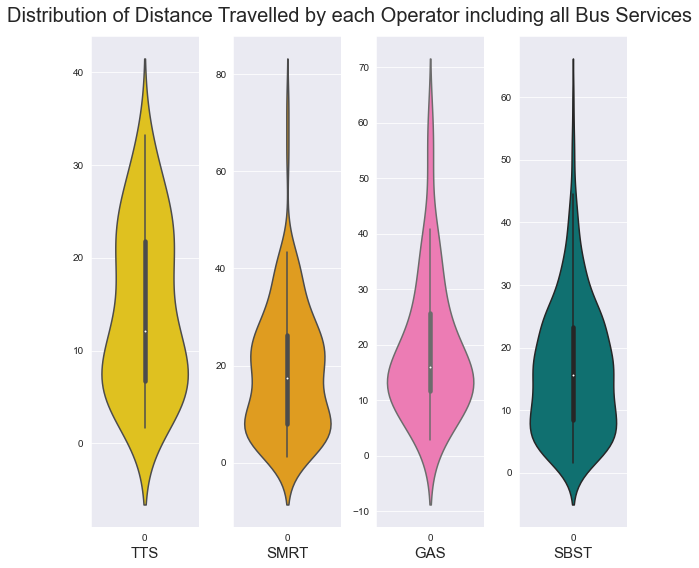

In [6]:
df = pd.read_csv('data/bus_routes.csv' ,dtype={"BusStopCode":"object"})
df = df.sort_values(['Operator'],ascending=True)


df2 = df[['ServiceNo','Direction','Distance','Operator']]
df2 = df2.groupby(by=['ServiceNo','Direction','Operator'])['Distance'].max().reset_index()


filt = df2["Direction"]==1
df2 = df2[filt]
display(df2)
df = df2.sort_values(['Operator'],ascending=True)



smrt = df[df.Operator == 'SMRT']['Distance'].tolist()
gas = df[df.Operator == 'GAS']['Distance'].tolist()
sbst = df[df.Operator == 'SBST']['Distance'].tolist()
tts = df[df.Operator == 'TTS']['Distance'].tolist()
df

fig = plt.figure(figsize=(8, 8))
sns.set_style("darkgrid")
sns.color_palette("Spectral", as_cmap=True)
gs = fig.add_gridspec(1, 4)
fig.suptitle('Distribution of Distance Travelled by each Operator including all Bus Services',fontsize=20)

ax = fig.add_subplot(gs[0, 0])
sns.violinplot(data=tts,color="gold")
ax.set_xlabel("TTS",fontsize=15)

ax = fig.add_subplot(gs[0, 1])
sns.violinplot(data=smrt, color="orange")
ax.set_xlabel("SMRT",fontsize=15)

ax = fig.add_subplot(gs[0, 2])
sns.violinplot(data=gas , color="hotpink")
ax.set_xlabel("GAS",fontsize=15)

ax = fig.add_subplot(gs[0, 3])
sns.violinplot(data=sbst, color="teal")
ax.set_xlabel("SBST",fontsize=15)

fig.tight_layout()
plt.show()


In [7]:
df = pd.read_csv('data/bus_routes.csv')
routeDF = df.sort_values(['Operator'],ascending=True)

routeDF = df[['ServiceNo','Distance','Operator']]
routeDF = routeDF.groupby(by=['ServiceNo','Operator'])['Distance'].max().reset_index()

display(routeDF)

,ServiceNo,Operator,Distance
0,10,SBST,31.9
1,100,SBST,23.6
2,100A,SBST,4.7
3,101,SBST,15.5
4,102,SBST,23.3
...,...,...,...
550,NR3,SMRT,31.0
551,NR5,SMRT,34.0
552,NR6,SMRT,36.7
553,NR7,SMRT,41.1


In [8]:
df = pd.read_csv('data/bus_services.csv')
df.replace('-',np.nan, inplace=True)
df = df.dropna()
df['AM_Peak_Freq'] = df['AM_Peak_Freq'].apply(calcAvg)
df.replace(0,np.nan, inplace=True)
df = df.dropna()
df['AM_Peak_Freq'] = pd.to_numeric(df['AM_Peak_Freq'], errors='coerce')



df['PM_Peak_Freq'] = df['PM_Peak_Freq'].apply(calcAvg)
df.replace(0,np.nan, inplace=True)
df = df.dropna()
df['PM_Peak_Freq'] = pd.to_numeric(df['PM_Peak_Freq'], errors='coerce')
df = df.dropna()

df = df.groupby(by=['ServiceNo'])['Operator','AM_Peak_Freq','PM_Peak_Freq'].mean().reset_index()

finalDF = df.merge(routeDF,left_on='ServiceNo', right_on='ServiceNo')

finalDF

C:\Users\jwchi\AppData\Local\Temp\ipykernel_7348\3582498388.py:17: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\jwchi\AppData\Local\Temp\ipykernel_7348\3582498388.py:17: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ServiceNo,AM_Peak_Freq,PM_Peak_Freq,Operator,Distance
0,101,8.5,8.5,SBST,15.5
1,102,10.5,11.5,SBST,23.3
2,107M,14.5,14.5,SBST,26.3
3,11,16.0,17.0,SBST,10.5
4,110,9.5,12.0,SMRT,39.9
...,...,...,...,...,...
203,975,7.0,7.5,SMRT,36.6
204,979,5.0,5.5,SMRT,11.8
205,98,6.5,9.0,TTS,26.5
206,983,5.5,6.0,SMRT,11.7


In [9]:
fig = px.scatter_matrix(finalDF,width=1000, height=650)
fig.show()
# fig = px.scatter(df, x="sepal_width", y="sepal_length")
# fig.show()

C:\Users\jwchi\AppData\Local\Temp\ipykernel_7348\668125391.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,year,mode,ridership,number
0,2005,Bus,2779000,13220
1,2006,Bus,2833000,13831
2,2007,Bus,2932000,14192
3,2008,Bus,3087000,14976
4,2009,Bus,3047000,15659
5,2010,Bus,3199000,15936
6,2011,Bus,3385000,16652
7,2012,Bus,3481000,16768
8,2013,Bus,3601000,17065
9,2014,Bus,3751000,17109


[Text(0.5, 1.0, 'Number of buses over the Years')]

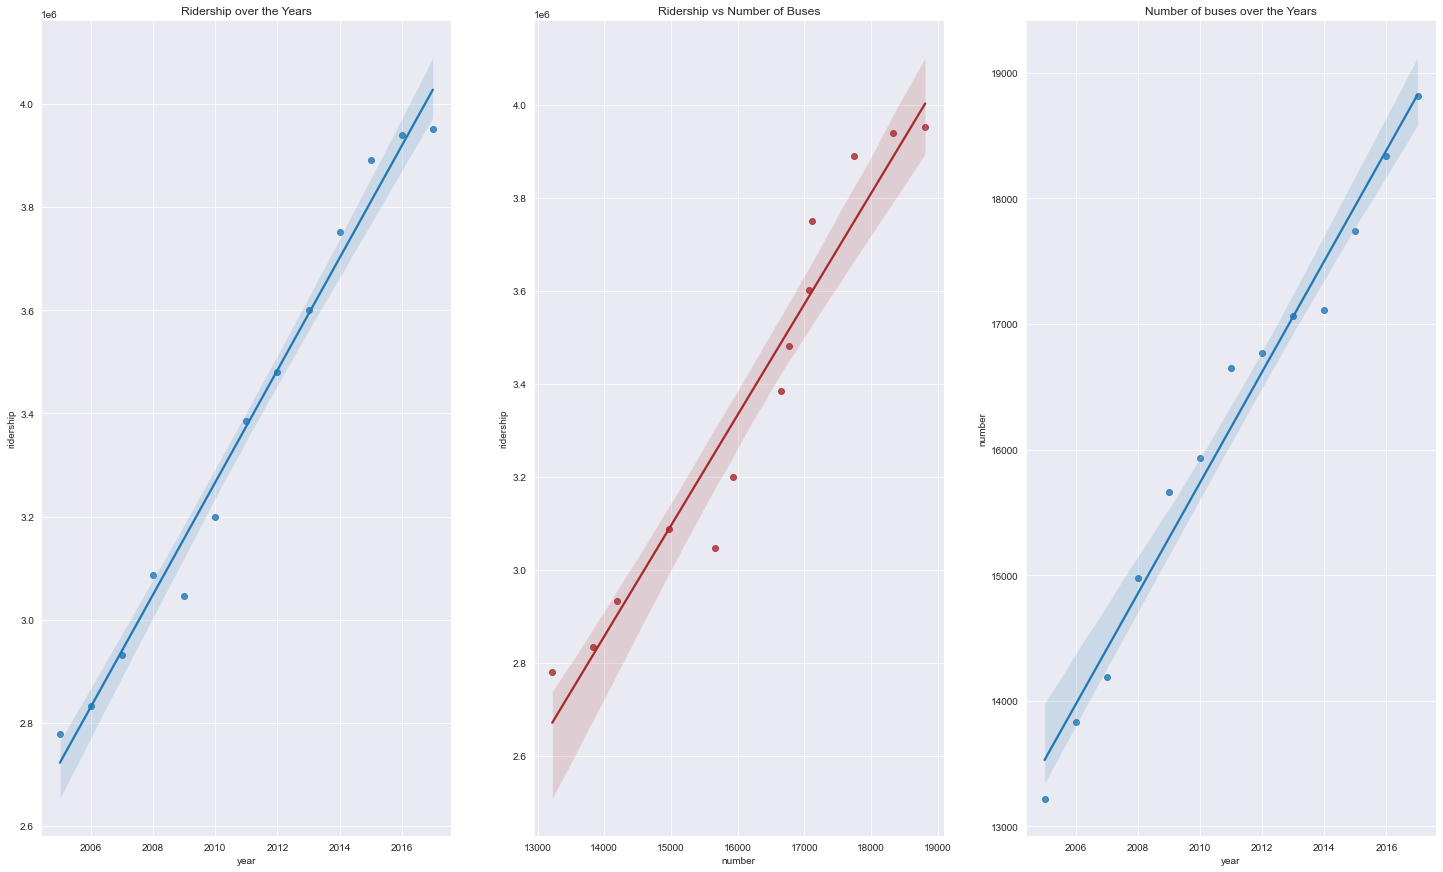

In [10]:
df = pd.read_csv('data/yearly_ave_daily_pt_ridership.csv')
df = df[df['mode']== 'Bus']


df2 = pd.read_csv('data/annual-bus-population-by-passenger-capacity.csv')
df2 = df2.groupby(by=['year']).sum().reset_index()


dataFinal= df.merge(df2, left_on='year', right_on='year')
display(dataFinal)


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,  figsize=(25,15))
sns.regplot(data=dataFinal, x='year', y='ridership', ax=ax1).set(title='Ridership over the Years')
sns.regplot(data=dataFinal ,x='number', y='ridership', ax=ax2,color='brown').set(title='Ridership vs Number of Buses')
sns.regplot(data=dataFinal ,x='year', y='number', ax=ax3).set(title='Number of buses over the Years')
